Theory question and answer

Question 1: Explain the differences between AI, ML, Deep Learning (DL), and Data Science (DS).

Answer: Artificial Intelligence (AI):

AI is the broadest concept. It means making computers or machines that can perform tasks usually requiring human intelligence, like playing chess, understanding speech, or recommending products.

Machine Learning (ML):

ML is a subset of AI. Instead of programming rules, ML lets computers “learn” from data to make predictions or decisions. Example: Email spam filter that learns what’s spam from examples.

Deep Learning (DL):

DL is a subset of ML that uses multi-layered neural networks (like a web of “virtual neurons”) to learn from lots of complex data, especially unstructured data like images or sound. Example: Face recognition on smartphones.

Data Science (DS):

DS includes not just AI/ML but also statistics, data analysis, and visualization to extract insights from data. Data Scientists often use ML, but also do data cleaning, visualization, and reporting.




Question 2: : What are the types of machine learning? Describe each with one real-world example.

1.	Answer: Supervised Learning

•	The machine learns from labeled data (the answer is given).
•	Example: Predicting house prices given past sales records, where each record includes the price (label).

2.	Unsupervised Learning


•	The machine finds patterns in unlabeled data (no answers given).
•	Example: Grouping customers into segments based on their shopping habits (clustering).

3.	Reinforcement Learning

•	The machine learns by trial and error, getting rewards or penalties.
•	Example: An AI playing a game like chess or a robot learning to walk.



Question 3: Define overfitting, underfitting, and the bias-variance tradeoff in machine learning.

Answer:

•	Overfitting:

The model learns the training data too well, including noise and outliers. It performs great on training data but poorly on new, unseen data.
Example: Memorizing practice questions instead of learning the concepts.

•	Underfitting:

The model is too simple and fails to capture patterns in the data, leading to poor performance on both training and new data.
Example: Guessing all answers are "B" on a test because you didn’t study at all.

•	Bias-Variance Tradeoff:

We want our model to be just right—not too simple (high bias, underfits) and not too complex (high variance, overfits). The best model balances bias (error due to simplifying assumptions) and variance (error due to sensitivity to small fluctuations in training data).





Question 4: What are outliers in a dataset, and list three common techniques for handling them.

Answer:

•	 Outliers:

Outliers are data points that are far away from other points and look unusual or unexpected.

Example:

 If most people in a company earn $30k–$60k but one gets $1,000,000, that's an outlier.

•	Handling Techniques:

1.	Remove outliers: Delete extreme points after verifying they are errors or irrelevant.
2.	Transform data: Apply log or square root to reduce the impact.
3.	Imputation: Replace outlier with median or mean of the data.


.


Question 5: Explain the process of handling missing values and mention one imputation technique for numerical and one for categorical data

answer

Process:

1.	Detect missing values (NaN, empty, etc.).
2.	Analyze why data is missing.
3.	Decide whether to drop or fill them.

Imputation Techniques:

•	Numerical: Fill missing numbers with the column mean or median.
Example: Replace empty ages with the average age.
•	Categorical: Fill missing categories with the most frequent value (mode).
Example: Replace missing payment method with the most common method.


In [20]:
#Question 6: Write a Python program that:
#● Creates a synthetic imbalanced dataset with make_classification() from
#sklearn.datasets.
#● Prints the class distribution

#answer

from sklearn.datasets import make_classification
import numpy as np
from collections import Counter

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    random_state=42
)


class_distribution = Counter(y)
print("Class distribution:", class_distribution)


for cls, count in class_distribution.items():
    print(f"Class {cls}: {count} samples ({count/len(y)*100:.2f}%)")


Class distribution: Counter({np.int64(0): 896, np.int64(1): 104})
Class 0: 896 samples (89.60%)
Class 1: 104 samples (10.40%)


In [11]:
#Question 7: Implement one-hot encoding using pandas for the following list of colors:
#['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.


#Answer
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']
df = pd.DataFrame({'Color': colors})
one_hot = pd.get_dummies(df, columns=['Color'])
print(one_hot)


   Color_Blue  Color_Green  Color_Red
0       False        False       True
1       False         True      False
2        True        False      False
3       False         True      False
4       False        False       True


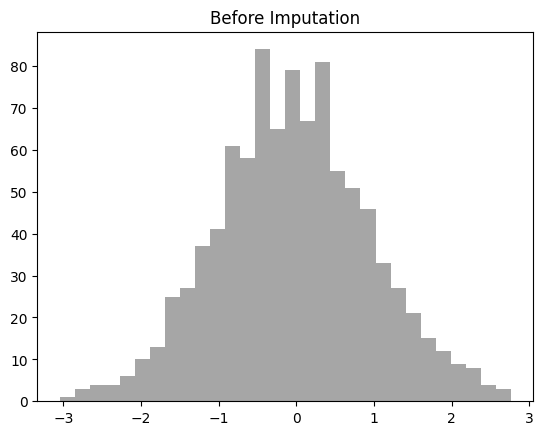

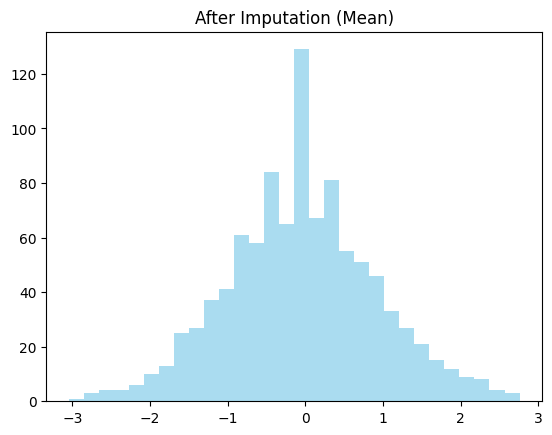

In [12]:
#Question 8: Write a Python script to:
#● Generate 1000 samples from a normal distribution.
#● Introduce 50 random missing values.
#● Fill missing values with the column mean.
#● Plot a histogram before and after imputation.


#Answer

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data = np.random.normal(loc=0, scale=1, size=1000)
missing_indices = np.random.choice(1000, 50, replace=False)
data_with_nan = data.copy()
data_with_nan[missing_indices] = np.nan

plt.hist(data_with_nan[~np.isnan(data_with_nan)], bins=30, color='gray', alpha=0.7)
plt.title('Before Imputation')
plt.show()

# Impute missing with mean
mean_val = np.nanmean(data_with_nan)
data_imputed = np.where(np.isnan(data_with_nan), mean_val, data_with_nan)

plt.hist(data_imputed, bins=30, color='skyblue', alpha=0.7)
plt.title('After Imputation (Mean)')
plt.show()


In [25]:
#Question 9: Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
#20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

#Answer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("Original data:\n", data.ravel())
print("Scaled data:\n", scaled_data.ravel())


Original data:
 [ 2  5 10 15 20]
Scaled data:
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


In [23]:
#Question 10: You are working as a data scientist for a retail company. You receive a customer
#transaction dataset that contains:
#● Outliers in transaction amount,
#● A highly imbalanced target (fraud vs. non-fraud),
#● Categorical variables like payment method.
#Explain the step-by-step data preparation plan you’d follow before training a machine learning
#model. Include how you’d address missing data, outliers, imbalance, and encoding.

#Answer
'''Step-by-Step:

Handle missing ages:

Impute missing with median age (less affected by outliers).

Handle outliers in transaction amount:

Use boxplots or IQR to detect.

Cap/floor outliers or replace with median value.

Handle imbalanced target (fraud vs. non-fraud):

Resample: oversample minority (fraud) or undersample majority.

Or, use advanced techniques like SMOTE.

Encode categorical variables:

Use one-hot encoding for payment methods and any other categorical features.'''

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from collections import Counter

# Example synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    "age": np.random.choice([25, 30, 35, np.nan], size=500, p=[0.3, 0.3, 0.2, 0.2]),
    "amount": np.concatenate([np.random.normal(50, 10, 480), np.random.normal(500, 50, 20)]),
    "payment_method": np.random.choice(["card", "upi", "netbanking", np.nan], size=500),
    "fraud": np.random.choice([0, 1], size=500, p=[0.95, 0.05])  # imbalanced
})

X = data.drop("fraud", axis=1)
y = data["fraud"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define feature groups
numeric_features = ["age", "amount"]
categorical_features = ["payment_method"]

# Numeric pipeline: impute -> log transform -> scale
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", RobustScaler())
])

# Categorical pipeline: impute -> one-hot encode
categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="MISSING")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Full pipeline with SMOTE for imbalance
pipeline = ImbPipeline([
    ("preprocess", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42))
])

# Fit and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("Class distribution before resampling:", Counter(y_train))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Class distribution before resampling: Counter({0: 376, 1: 24})

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91        94
           1       0.08      0.17      0.11         6

    accuracy                           0.83       100
   macro avg       0.51      0.52      0.51       100
weighted avg       0.89      0.83      0.86       100

